In [1]:
import numpy as np
import random
from scipy.interpolate import griddata
from scipy.stats import multivariate_normal
import numpy.ma as ma
from numpy.random import uniform, seed
from matplotlib import cm
from scipy.special import softmax
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n1=150; n2=250; n3=300
n = n1+n2+n3
x = []
x.append(np.dot(np.random.randn(n1,2),np.sqrt(np.diag([1,4]))))
x.append(np.random.randn(n2,2)+np.dot(np.asarray([[1.]*n2]).T,np.asarray([[8.0,4.0]])))
x.append(np.dot(np.random.randn(n3,2),np.sqrt(np.asarray([[2.45,1],[1,4]])))+16.0)

In [3]:
X = np.concatenate((x[0],x[1],x[2]),axis=0)
print(X.shape)

(700, 2)


In [4]:
Sigma_true = np.asarray([[[1,0],[0,4]],[[1,0],[0,1]],[[2.45,3],[3,4]]])
Mu_true = np.asarray([[0,0],[8,4],[16,16]])
print(Sigma_true)
print(Mu_true)

[[[1.   0.  ]
  [0.   4.  ]]

 [[1.   0.  ]
  [0.   1.  ]]

 [[2.45 3.  ]
  [3.   4.  ]]]
[[ 0  0]
 [ 8  4]
 [16 16]]


In [5]:
def gauss(x,sigma,mu):
    n = multivariate_normal(mu,sigma)
    return n.pdf(x)

In [27]:
def plot_countour(sigma,mu):
    xy_range = np.zeros((2,2))
    xy_range[0] = np.linspace(mu[0]-2*sigma[0,0],mu[0]+2*sigma[0,0],2)
    xy_range[1] = np.linspace(mu[1]-2*sigma[1,1],mu[1]+2*sigma[1,1],2)
    x, y = np.mgrid[xy_range[0][0]:xy_range[0][1]:.01, xy_range[1][0]:xy_range[1][1]:.01]
    pos = np.dstack((x, y))
    rv = multivariate_normal(mu, sigma)
    z = rv.pdf(pos)
    levels = np.linspace(np.min(z),np.max(z),5)
    plt.contour(x, y, z,linewidths=1.0,colors='black',levels=levels)
    #plt.contourf(x,y,z,15,cmap=plt.cm.jet)
    plt.xlim([-5,25])
    
def plot_countour_mixed(Sigma,Mu,W):
    x, y = np.mgrid[-5:25:.01, -5:25:.01]
    pos = np.dstack((x, y))
    z = np.zeros((3000,3000))
    print(z.shape)
    print(len(W))
    for k in range(len(W)):
        print(W[k])
        sigma = Sigma[k]; mu = Mu[k]
        rv = multivariate_normal(mu, sigma)
        ztmp = rv.pdf(pos)
        z += W[k]*ztmp
    print(z.shape)
    #levels = np.linspace(np.min(z),np.max(z),5)
    plt.contour(x, y, z,linewidths=1.0,colors='black')
    #plt.contourf(x,y,z,15,cmap=plt.cm.jet)
    plt.xlim([-5,25])

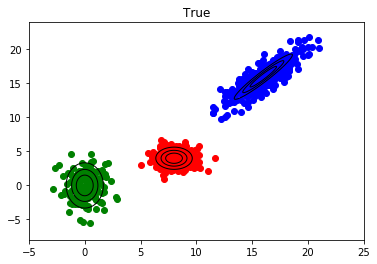

In [32]:

plot_countour(sigma=Sigma_true[0], mu=Mu_true[0])
plot_countour(sigma=Sigma_true[1], mu=Mu_true[1])
plot_countour(sigma=Sigma_true[2], mu=Mu_true[2])
#plot_countour_mixed(Sigma=Sigma_true,Mu=Mu_true,W=[3/14,5/8,3/7])

plt.scatter(x[0][:,0],x[0][:,1],c='green')
plt.scatter(x[1][:,0],x[1][:,1],c='red')
plt.scatter(x[2][:,0],x[2][:,1],c='blue')

plt.title("True")
plt.show()

In [30]:
def genSigma():
    A = np.random.rand(2,2)+np.eye(2,2)
    #A = np.eye(2,2)*np.random.rand(1)
    S = np.dot(A.T,A)
    #S = np.diag(np.diag(S))
    return S

def genMu(m):
    mu = np.zeros((2,m))
    mu[0] = np.linspace(np.min(X,axis=0)[0],np.max(X,axis=0)[0],m)
    mu[1] = np.linspace(np.min(X,axis=0)[1],np.max(X,axis=0)[1],m)
    return mu.T

====== m = 2 ======
iter# 1  Lnew: -18005.556981873437
iter# 2  Lnew: -3522.667611294477
iter# 3  Lnew: -3498.9206066380907
iter# 4  Lnew: -3458.8691161212287
iter# 5  Lnew: -3409.482750060086
iter# 6  Lnew: -3404.677283137214
iter# 7  Lnew: -3404.6606941023497
iter# 8  Lnew: -3404.660423618946
Model Converged


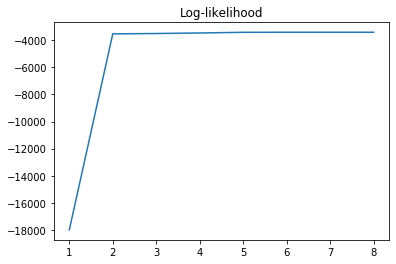

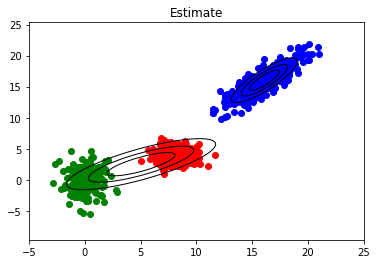

Sigma
[[16.10079224  7.74633654]
 [ 7.74633654  6.09328765]]
[[3.13239714 3.2335943 ]
 [3.2335943  4.66323885]]
Mu
[5.04848269 2.50598873]
[16.09760861 16.0342747 ]
W
0.5723387607280941
0.4276612392719058
====== m = 3 ======
iter# 1  Lnew: -5657.621510869707
iter# 2  Lnew: -3409.931567959705
iter# 3  Lnew: -3336.7052339996885
iter# 4  Lnew: -3297.4360915709076
iter# 5  Lnew: -3233.332113585667
iter# 6  Lnew: -3135.7986308014374
iter# 7  Lnew: -3064.185539453783
iter# 8  Lnew: -3063.880507363282
Model Converged


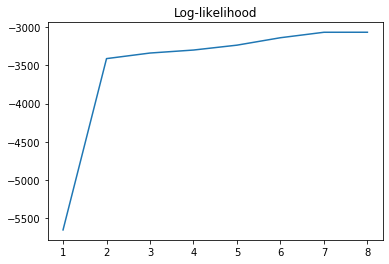

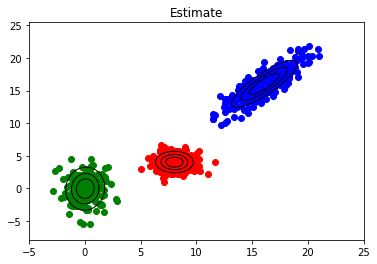

Sigma
[[1.10149558 0.08928569]
 [0.08928569 3.92631812]]
[[ 1.06624056 -0.0133382 ]
 [-0.0133382   1.01271934]]
[[3.15249498 3.27072097]
 [3.27072097 4.72737612]]
Mu
[ 0.04398368 -0.05693145]
[8.03186722 4.02421424]
[16.09020044 16.02175563]
W
0.21428591081672144
0.35714044319674254
0.4285736459865356


In [31]:
for m in [2,3]:
    print("====== m = %d ======"%(m))
    Sigma = np.zeros((m,2,2))
    for i in range(m):
        Sigma[i] = (genSigma())

    Mu = genMu(m)    
    W = np.asarray([1.]*m)
    W = W/sum(W)
    L = -float('inf')

    iteration = 0
    iters = []
    Log = []
    while True:
        if iteration >=100:
            break
        iteration+=1
        wN = np.zeros((n,m))
        for j in range(m):
            for i in range(n):
                wN[i,j]=W[j]*gauss(X[i],Sigma[j],Mu[j])

        sum_wN = np.sum(wN,axis=1)
        Lnew = np.sum(np.log(sum_wN))
        if (Lnew-L) < 0.00001:
            print("Model Converged")
            break
        L = Lnew

        print("iter#",iteration," Lnew:",Lnew)
        iters.append(iteration)
        Log.append(Lnew)

        eta = np.zeros((n,m))
        for i in range(n):
            eta[i,:]=wN[i]/sum_wN[i]

        sum_eta = np.sum(eta,axis=0)
        W = sum_eta/n

        for j in range(m):
            tmp = np.zeros((2,))
            for i in range(n):
                tmp += eta[i,j]*X[i]
            Mu[j]=tmp/sum_eta[j]

        for j in range(m):
            tmp = np.zeros((2,2))
            for i in range(n):
                xmu = (X[i]-Mu[j]).reshape(2,1)
                tmp1 = np.dot(xmu,xmu.T)*eta[i][j]
                tmp += tmp1
            Sigma[j]=tmp/sum_eta[j]


    plt.plot(iters,Log)
    plt.title("Log-likelihood")
    plt.xticks(range(1,min(20,iteration)))
    plt.show()
    
    plt.scatter(x[0][:,0],x[0][:,1],c='green')
    plt.scatter(x[1][:,0],x[1][:,1],c='red')
    plt.scatter(x[2][:,0],x[2][:,1],c='blue')

    for i in range(m):
        plot_countour(sigma=Sigma[i], mu=Mu[i])

    plt.title("Estimate")
    plt.show()


    print("Sigma")
    for i in range(m):
        print(Sigma[i])

    print("Mu")
    for i in range(m):
        print(Mu[i])

    print("W")
    for i in range(m):
        print(W[i])

# Cross Validation

In [10]:
idx = list(range(len(X)))
random.shuffle(idx)
ng = 5
nxg = len(idx)//ng
idx_group = []
ij = 0
for i in range(ng):
    tmp = []
    for j in range(nxg):
        tmp.append(idx[ij])
        ij+=1
    idx_group.append(tmp)

In [11]:
all_log = []
for m in [2,3,4,5]:
    print("======= m = %d ======="%(m))
    test_log = []

    for eidx in range(ng):
        idx_test = set(idx_group[0])
        idx_train = set(idx).difference(idx_test)
        #print(len(idx_train))
        #print(len(idx_test))
        X_train = np.zeros((nxg*(ng-1),2))
        X_test = np.zeros((nxg,2))
        j=0
        for i in idx_train:
            X_train[j]=X[i]
            j+=1
        j=0
        for i in idx_test:
            X_test[j]=X[i]
            j+=1

        print("------ eidx= %d "%(eidx))
        Sigma = np.zeros((m,2,2))
        for i in range(m):
            Sigma[i] = (genSigma())

        Mu = genMu(m)    
        W = np.asarray([1.]*m)
        W = W/sum(W)
        L = -float('inf')

        iteration = 0
        iters = []
        Log = []
        while True:
            #print("iter#",iteration," Lnew:",Lnew)
            #if (iteration%50==0):
                #print("#iteration%d"%(iteration))
            if (iteration>=100):
                print("#break at iter#",iteration-1)
                break
            iteration+=1
            wN = np.zeros((len(X_train),m))
            for j in range(m):
                for i in range(len(X_train)):
                    wN[i,j]=W[j]*gauss(X_train[i],Sigma[j],Mu[j])

            sum_wN = np.sum(wN,axis=1)
            Lnew = np.sum(np.log(sum_wN))
            if (Lnew-L) < 0.0001:
                print("Model Converged at iter#",iteration-1)
                break
            L = Lnew

            iters.append(iteration)
            Log.append(Lnew)

            eta = np.zeros((len(X_train),m))
            for i in range(len(X_train)):
                eta[i,:]=wN[i]/sum_wN[i]

            sum_eta = np.sum(eta,axis=0)
            W = sum_eta/n

            for j in range(m):
                tmp = np.zeros((2,))
                for i in range(len(X_train)):
                    tmp += eta[i,j]*X_train[i]
                Mu[j]=tmp/sum_eta[j]

            for j in range(m):
                tmp = np.zeros((2,2))
                for i in range(len(X_train)):
                    xmu = (X_train[i]-Mu[j]).reshape(2,1)
                    tmp1 = np.dot(xmu,xmu.T)*eta[i][j]
                    tmp += tmp1
                Sigma[j]=tmp/sum_eta[j]
            #print("Sigma")
            #for i in range(m):
                #print(Sigma[i])

        wN_test = np.zeros((len(X_test),m))
        for j in range(m):
            for i in range(len(X_test)):
                wN_test[i,j]=W[j]*gauss(X_test[i],Sigma[j],Mu[j])

        sum_wN_test = np.sum(wN_test,axis=1)
        Ltest = np.sum(np.log(sum_wN_test))
        test_log.append(Ltest)
    mean_log = np.mean(test_log)
    print("mean of Log-likelihood:", mean_log)
    all_log.append(mean_log)

======= m = 2 =======
------ eidx= 0 
Model Converged at iter# 4
------ eidx= 1 
Model Converged at iter# 5
------ eidx= 2 
Model Converged at iter# 6
------ eidx= 3 
Model Converged at iter# 4
------ eidx= 4 
Model Converged at iter# 4
mean of Log-likelihood: -716.0262676143013
======= m = 3 =======
------ eidx= 0 
Model Converged at iter# 9
------ eidx= 1 
Model Converged at iter# 6
------ eidx= 2 
Model Converged at iter# 9
------ eidx= 3 
Model Converged at iter# 9
------ eidx= 4 
Model Converged at iter# 8
mean of Log-likelihood: -644.8188623823331
======= m = 4 =======
------ eidx= 0 
#break at iter# 99
------ eidx= 1 
#break at iter# 99
------ eidx= 2 
#break at iter# 99
------ eidx= 3 
#break at iter# 99
------ eidx= 4 
#break at iter# 99
mean of Log-likelihood: -646.9118776069208
======= m = 5 =======
------ eidx= 0 
Model Converged at iter# 82
------ eidx= 1 
Model Converged at iter# 72
------ eidx= 2 
#break at iter# 99
------ eidx= 3 
Model Converged at iter# 87
------ eidx